# Analysis of Student Alcohol Consumption and Grade

## Part A - Data Preprocessing
### 1. Import packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [2]:
%matplotlib inline

In [3]:
student_por_data=pd.read_csv('student-alcohol-consumption/student-por.csv')

### 2. Data Overview

In [4]:
student_por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
print("Number of rows:", student_por_data.shape[0])

Number of rows: 649


In [6]:
student_por_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### 3. Convert binary categorical features into numeric forms

In [7]:
student_por_data['school'] = student_por_data['school'].apply(lambda x: 1 if x == 'GP' else 0)
student_por_data['sex'] = student_por_data['sex'].apply(lambda x: 1 if x == 'M' else 0)
student_por_data['address'] = student_por_data['address'].apply(lambda x: 1 if x == 'U' else 0)
student_por_data['famsize'] = student_por_data['famsize'].apply(lambda x: 1 if x == 'GT3' else 0)
student_por_data['Pstatus'] = student_por_data['Pstatus'].apply(lambda x: 1 if x == 'T' else 0)

student_por_data['schoolsup'] = student_por_data['schoolsup'].apply(lambda x: 1 if x == 'yes' else 0)
student_por_data['famsup'] = student_por_data['famsup'].apply(lambda x: 1 if x == 'yes' else 0)
student_por_data['paid'] = student_por_data['paid'].apply(lambda x: 1 if x == 'yes' else 0)
student_por_data['activities'] = student_por_data['activities'].apply(lambda x: 1 if x == 'yes' else 0)
student_por_data['nursery'] = student_por_data['nursery'].apply(lambda x: 1 if x == 'yes' else 0)
student_por_data['higher'] = student_por_data['higher'].apply(lambda x: 1 if x == 'yes' else 0)

student_por_data['internet'] = student_por_data['internet'].apply(lambda x: 1 if x == 'yes' else 0)
student_por_data['romantic'] = student_por_data['romantic'].apply(lambda x: 1 if x == 'yes' else 0)

In [8]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', 40):
    print (student_por_data.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu     Mjob      Fjob  \
0       1    0   18        1        1        0     4     4  at_home   teacher   
1       1    0   17        1        1        1     1     1  at_home     other   
2       1    0   15        1        0        1     1     1  at_home     other   
3       1    0   15        1        1        1     4     2   health  services   
4       1    0   16        1        1        1     3     3    other     other   

   reason guardian  traveltime  studytime  failures  schoolsup  famsup  paid  \
0  course   mother           2          2         0          1       0     0   
1  course   father           1          2         0          0       1     0   
2   other   mother           1          2         0          1       0     0   
3    home   mother           1          3         0          0       1     0   
4    home   father           1          2         0          0       1     0   

   activities  nursery  higher  

### 4. Statistical Analysis for each column
##### School

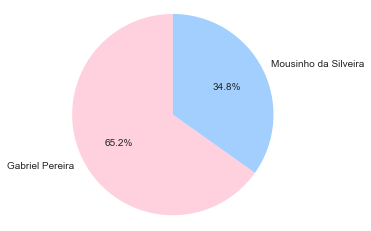

In [9]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(student_por_data['school'].value_counts().tolist(), 
        labels=['Gabriel Pereira', 'Mousinho da Silveira'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

##### Sex

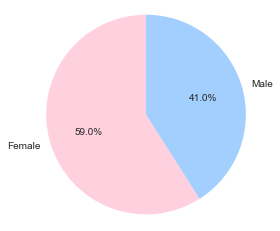

In [10]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(student_por_data['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

##### Age

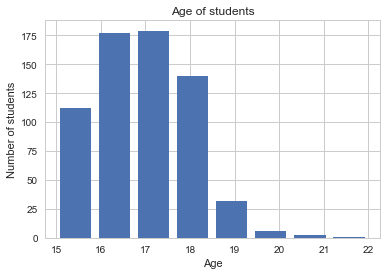

In [11]:
plt.hist(student_por_data['age'], rwidth=0.8, bins=8)
plt.title('Age of students')
plt.xlabel('Age')
plt.ylabel('Number of students')
plt.show()

##### Address

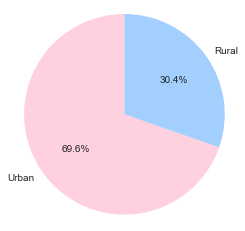

In [12]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(student_por_data['address'].value_counts().tolist(), 
        labels=['Urban', 'Rural'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

##### Family Size

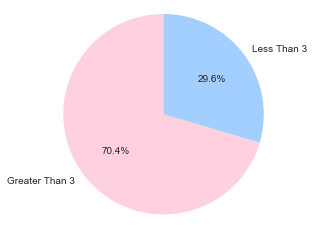

In [13]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(student_por_data['famsize'].value_counts().tolist(), 
        labels=['Greater Than 3', 'Less Than 3'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

##### Parent's cohabitation status

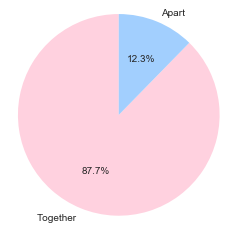

In [14]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(student_por_data['Pstatus'].value_counts().tolist(), 
        labels=['Together', 'Apart'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

##### Parent's Education Level

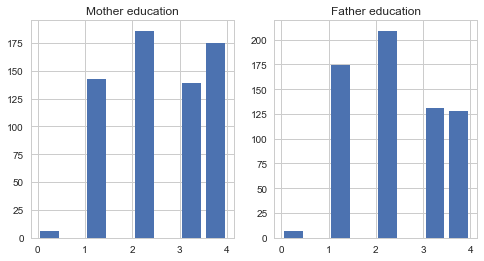

In [15]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.hist(student_por_data['Medu'], rwidth=0.8, bins=8)
plt.title('Mother education')

plt.subplot(122)
plt.hist(student_por_data['Fedu'], rwidth=0.8, bins=8)
plt.title('Father education')
plt.show()

##### Parent's Job

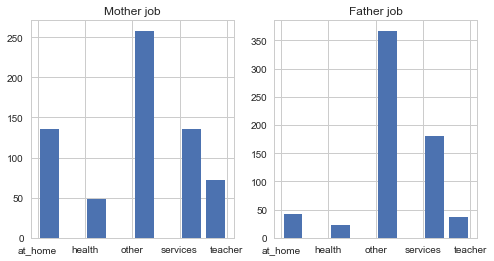

In [16]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.hist(student_por_data['Mjob'], rwidth=0.8, bins=8)
plt.title('Mother job')

plt.subplot(122)
plt.hist(student_por_data['Fjob'], rwidth=0.8, bins=8)
plt.title('Father job')
plt.show()

##### Reason to choose school

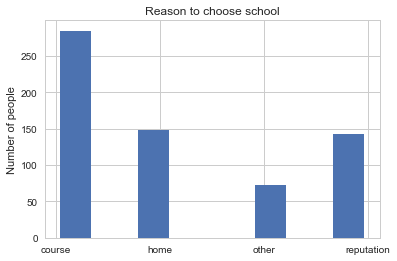

In [17]:
plt.hist(student_por_data['reason'], rwidth=0.8, bins=8)
plt.title('Reason to choose school')
plt.ylabel('Number of people')
plt.show()

##### Guardian

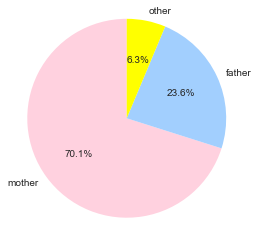

In [18]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(student_por_data['guardian'].value_counts().tolist(), 
        labels=['mother', 'father', 'other'], colors=['#ffd1df', '#a2cffe', '#ffff00'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

##### Home to school travel time

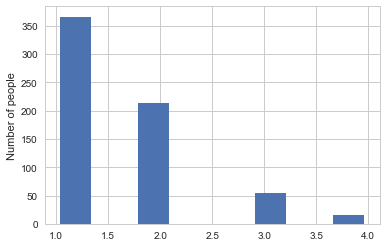

In [19]:
plt.hist(student_por_data['traveltime'], rwidth=0.8, bins=8)
plt.ylabel('Number of people')
plt.show()

##### Quality of family relationships

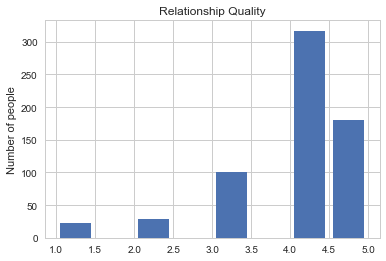

In [20]:
plt.hist(student_por_data['famrel'], rwidth=0.8, bins=8)
plt.title('Relationship Quality')
plt.ylabel('Number of people')
plt.show()

##### Alcohol consumption

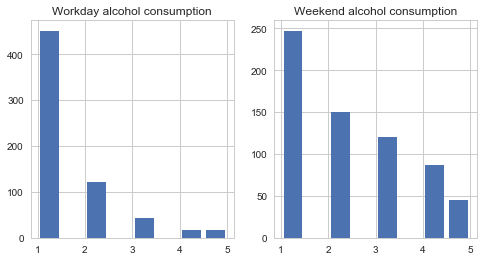

In [21]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.hist(student_por_data['Dalc'], rwidth=0.8, bins=8)
plt.title('Workday alcohol consumption')

plt.subplot(122)
plt.hist(student_por_data['Walc'], rwidth=0.8, bins=8)
plt.title('Weekend alcohol consumption')
plt.show()

##### Current health status

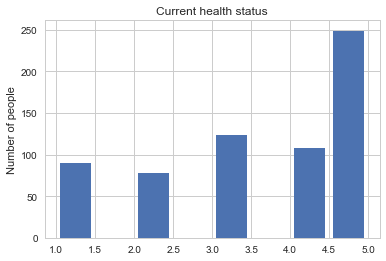

In [22]:
plt.hist(student_por_data['health'], rwidth=0.8, bins=8)
plt.title('Current health status')
plt.ylabel('Number of people')
plt.show()

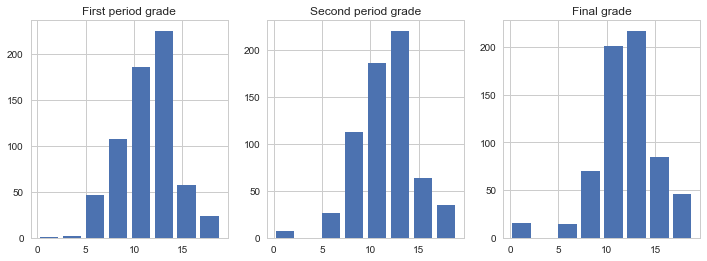

In [23]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.hist(student_por_data['G1'], rwidth=0.8, bins=8)
plt.title('First period grade')

plt.subplot(132)
plt.hist(student_por_data['G2'], rwidth=0.8, bins=8)
plt.title('Second period grade')

plt.subplot(133)
plt.hist(student_por_data['G3'], rwidth=0.8, bins=8)
plt.title('Final grade')
plt.show()

### 5. Exploratory Data Analysis
##### Alcohol Consumption and Health

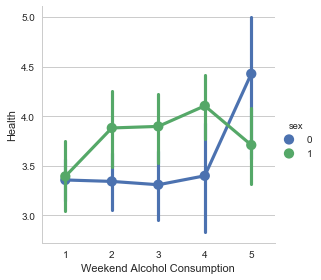

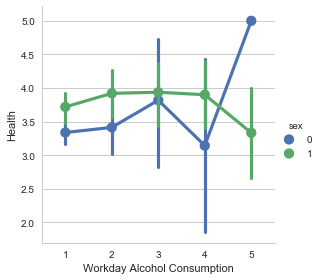

In [24]:
plot1 = sns.factorplot(x="Walc", y="health", hue="sex", data=student_por_data)
plot1.set(ylabel="Health", xlabel="Weekend Alcohol Consumption")
plot2 = sns.factorplot(x="Dalc", y="health", hue="sex", data=student_por_data)
plot2.set(ylabel="Health", xlabel="Workday Alcohol Consumption")

##### Alcohol Consumption and Final Grade¶

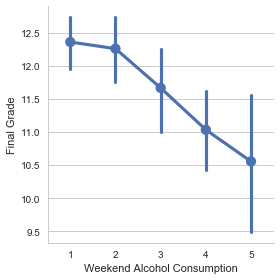

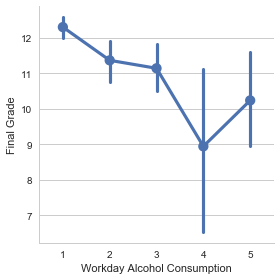

In [32]:
plot1 = sns.factorplot(x="Walc", y="G3", data=student_por_data)
plot1.set(ylabel="Final Grade", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="Dalc", y="G3", data=student_por_data)
plot2.set(ylabel="Final Grade", xlabel="Workday Alcohol Consumption")

##### Trend across age and Walc/Dalc/failures/study time for different age

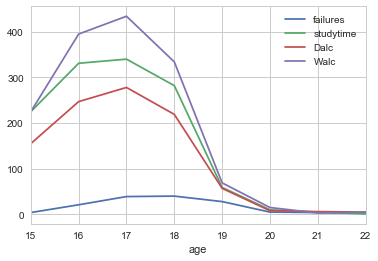

In [26]:
student_por_data[['failures', 'studytime', 'age', 'Dalc', 'Walc']].groupby(['age']).sum().plot()

##### Trend across Dalc/Walc and health/studytime/failures/Final grade

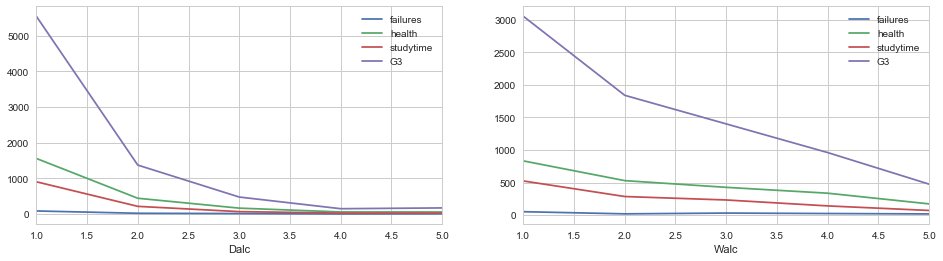

In [27]:
fig, ax  = plt.subplots(1, 2, figsize=(16, 4))

student_por_data[['failures', 'health', 'studytime', 'G3', 'Dalc']].groupby(['Dalc']).sum().plot(ax=ax[0])
student_por_data[['failures', 'health', 'studytime', 'G3', 'Walc']].groupby(['Walc']).sum().plot(ax=ax[1])

##### Heatmap of all the factor

In [28]:
# Convert non-binary categorical features into dummy format
student_por_dummy = pd.concat([student_por_data, pd.get_dummies(student_por_data['Mjob'], prefix='Mjob')], axis=1)
student_por_dummy = pd.concat([student_por_dummy, pd.get_dummies(student_por_dummy['Fjob'], prefix='Fjob')], axis=1)
student_por_dummy = pd.concat([student_por_dummy, pd.get_dummies(student_por_dummy['reason'], prefix='reason')], axis=1)
student_por_dummy = pd.concat([student_por_dummy, pd.get_dummies(student_por_dummy['guardian'], prefix='guardian')], axis=1)

student_por_dummy = student_por_dummy.drop(['Mjob', 'Fjob', 'reason', 'guardian'], axis=1)

In [29]:
student_por_dummy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,18,1,1,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,0,17,1,1,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,0,15,1,0,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,0,15,1,1,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,0,16,1,1,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


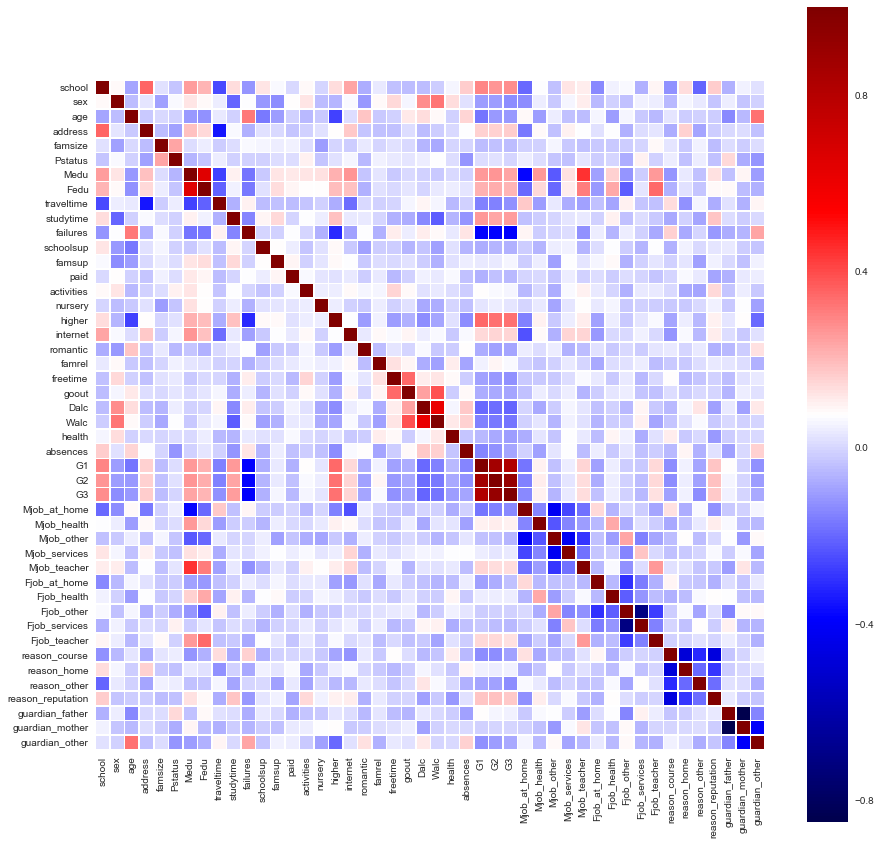

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(student_por_dummy.corr(), square=True, linewidths=.5, cmap='seismic')
plt.show()

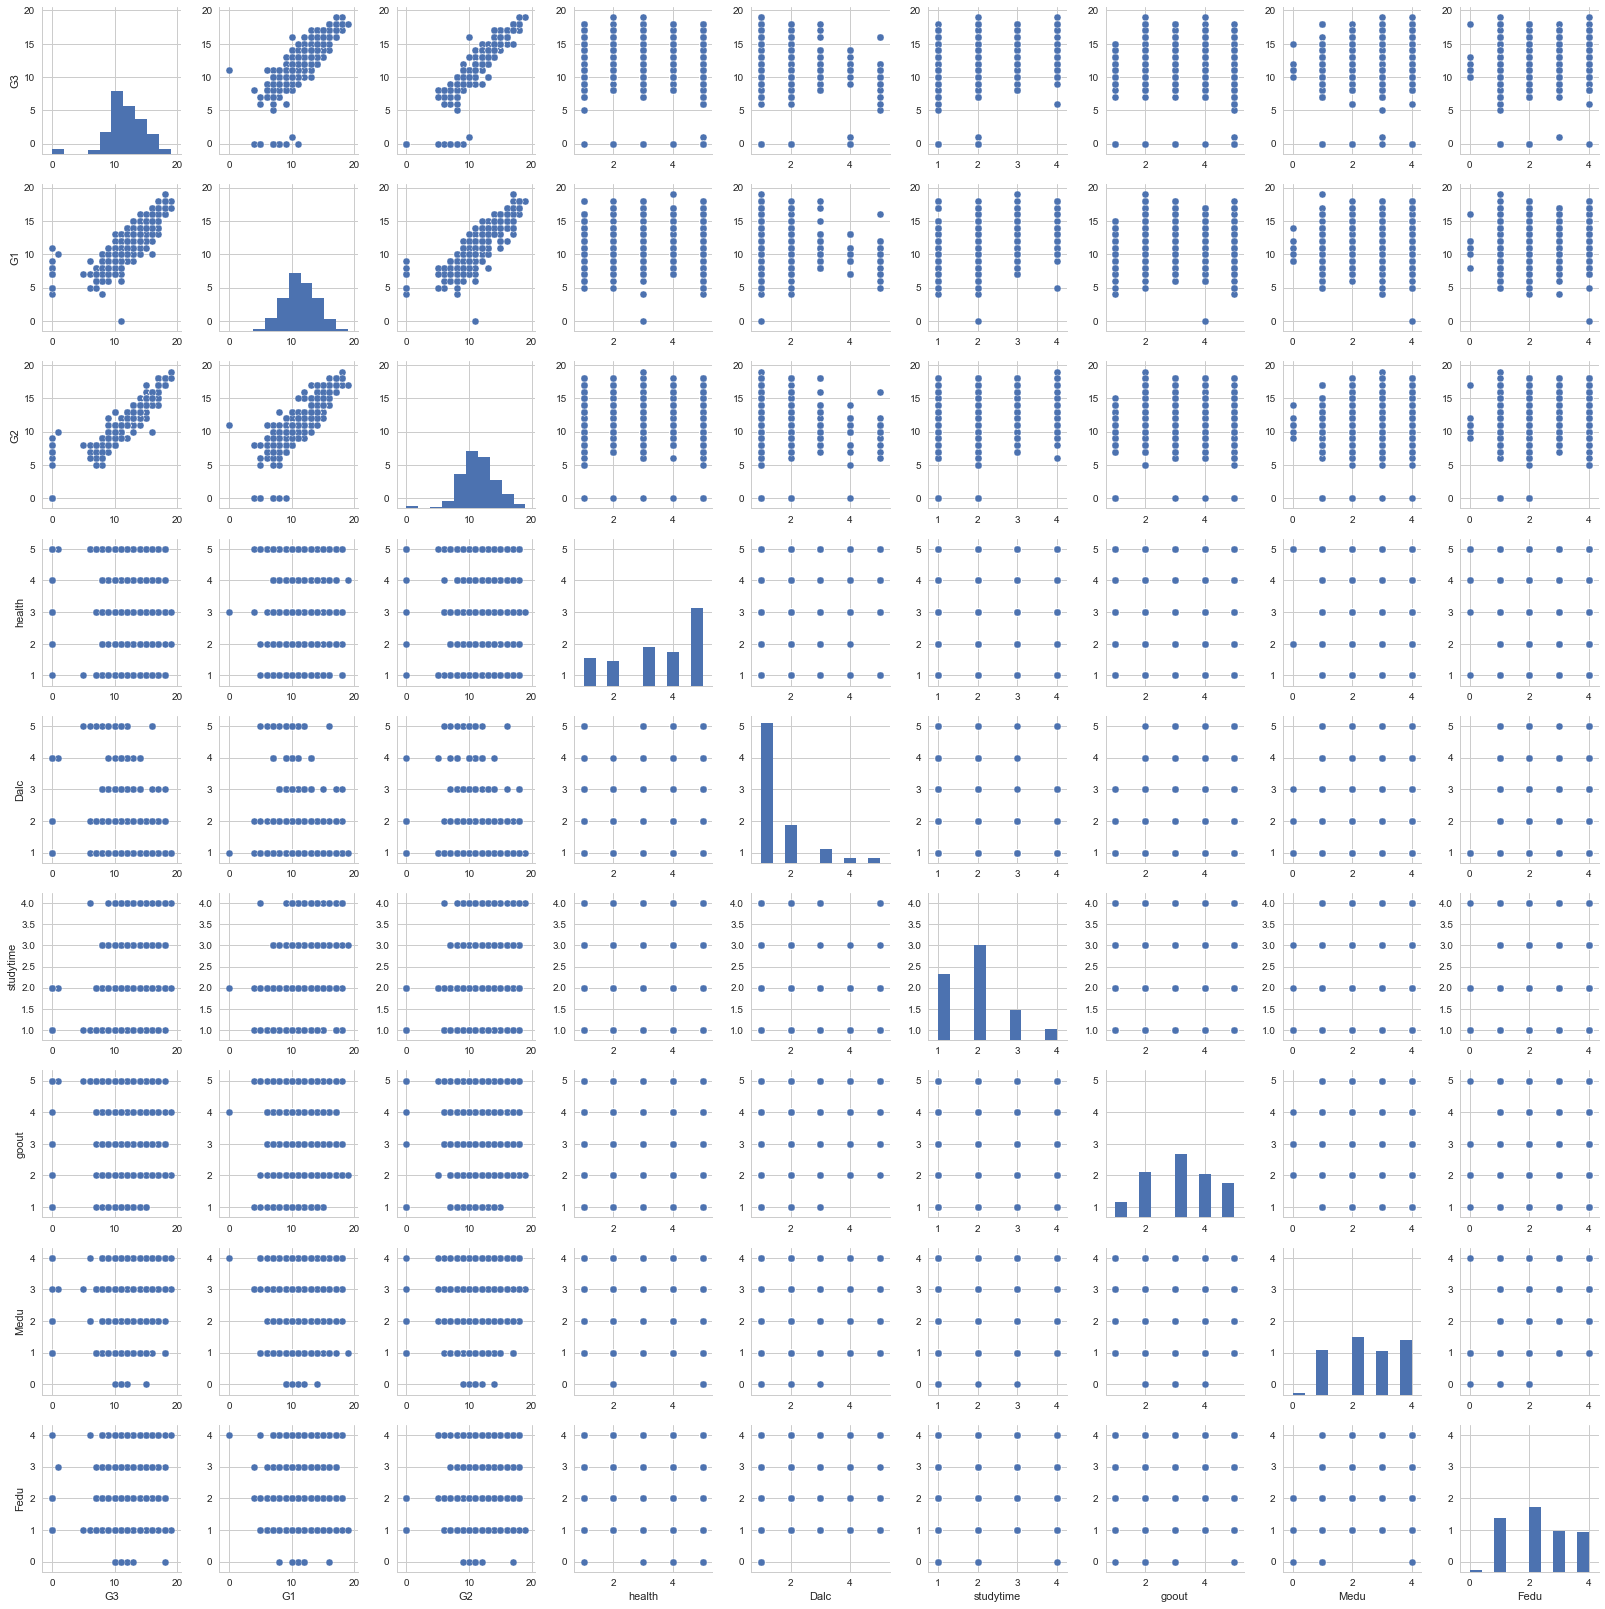

In [31]:
df_small = student_por_dummy[['G3', 'G1', 'G2', 'health', 'Dalc', 'studytime', 'goout', 'Medu', 'Fedu']]
sns.pairplot(df_small)

# Part B - Data Analysis
### 1. Data split

In [33]:
from sklearn.model_selection import train_test_split

X_Full = student_por_dummy.drop(['G1', 'G2', 'G3'], axis=1)
Y_Full = student_por_dummy['G3']

x_train, x_test, y_train, y_test = train_test_split(X_Full, Y_Full, test_size = 0.3, random_state=51)

### 2. Metrics to measure regression and classification

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regr_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print('mean_squared_error: ', mse)
    print('mean_absolute_error', mae)
    print('r2_score: ', r2)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

def clas_metrics(y_test, y_pred):
    print(accuracy_score(y_true=y_test, y_pred=y_pred))
    print(confusion_matrix(y_true=y_test, y_pred=y_pred))

### 3. Function to plot the true/prediction value

In [83]:
def plot_result(model, pred_value):
    plt.figure()
    plt.plot(np.arange(len(pred_value)), y_test,'go-',label='true value')
    plt.plot(np.arange(len(pred_value)),pred_value,'ro-',label='predict value')
    plt.title(model)
    plt.legend()
    plt.show()

### 4. Linear Regression/Lasso/Ridge regression

In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

ln_Regr = LinearRegression()
ln_Regr = ln_Regr.fit(x_train, y_train)
y_pred_ln = ln_Regr.predict(x_test)

Lasso_Regr = Lasso()
Lasso_Regr = Lasso_Regr.fit(x_train, y_train)
y_pred_lasso = Lasso_Regr.predict(x_test)

Ridge_Regr = Ridge()
Ridge_Regr = Ridge_Regr.fit(x_train, y_train)
y_pred_ridge = Ridge_Regr.predict(x_test)

In [45]:
regr_metrics(y_test, y_pred_ln)

mean_squared_error:  8.56218398925
mean_absolute_error 2.14414805877
r2_score:  0.293305362681


In [46]:
regr_metrics(y_test, y_pred_lasso)

mean_squared_error:  12.0828090513
mean_absolute_error 2.56702854839
r2_score:  0.00272449517345


In [47]:
regr_metrics(y_test, y_pred_ridge)

mean_squared_error:  8.56444866114
mean_absolute_error 2.14321907293
r2_score:  0.293118444077


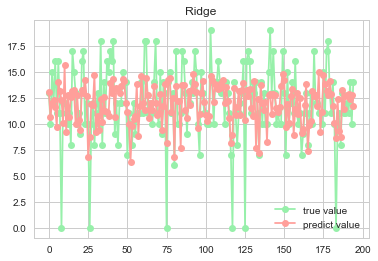

In [85]:
plot_result('Ridge', y_pred_ridge)

### 5. Gradient Boosting Regression

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_model = GradientBoostingRegressor(n_estimators=100)
gbrt_model = gbrt_model.fit(x_train, y_train)
y_pred_gbrt = gbrt_model.predict(x_test)

In [90]:
regr_metrics(y_test, y_pred_gbrt)

mean_squared_error:  7.87074685073
mean_absolute_error 2.08821862167
r2_score:  0.350374320607


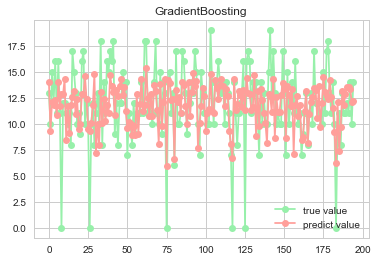

In [91]:
plot_result('GradientBoosting', y_pred_gbrt)

### 6. SVM regression/classification

In [95]:
from sklearn.svm import SVC, SVR

svr_model = SVR()
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_test)

svc_model = SVC()
svc_model.fit(x_train, y_train)
y_pred_svc = svc_model.predict(x_test)

In [96]:
regr_metrics(y_test, y_pred_svr)

mean_squared_error:  9.40374504234
mean_absolute_error 2.18496280517
r2_score:  0.223845668292


In [98]:
clas_metrics(y_test, y_pred_svc)

0.169230769231
[[ 0  0  0  0  0  4  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13  8  3  6  0  0  0  0  0  0]
 [ 0  0  0  0  0 18 10  3  7  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  4  1  5  0  2  0  0  0  0]
 [ 0  0  0  0  0  1  9  1  9  0  1  0  0  0  0]
 [ 0  0  0  0  0  6  3  1 10  0  2  0  0  0  0]
 [ 0  0  0  0  0  3  3  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  1  1  6  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  3  2  5  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  1  0  0  0  0]]


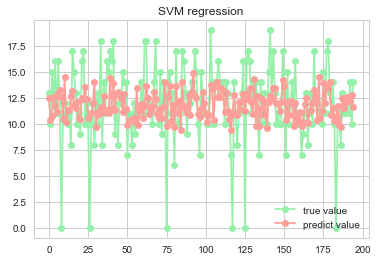

In [105]:
plot_result('SVM regression', y_pred_svr)

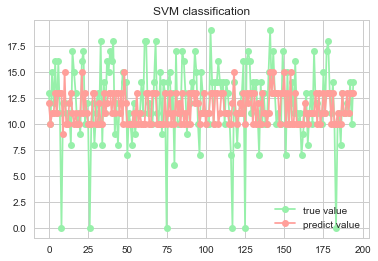

In [106]:
plot_result('SVM classification', y_pred_svc)

### 7. Random Forest classification

In [99]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42, criterion='gini', n_estimators = 500, max_features = 20)
rf_model = rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [101]:
clas_metrics(y_test, y_pred_rf)

0.174358974359
[[ 0  0  0  0  0  4  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  3  0  2  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  3  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  9  7  2  5  1  1  1  0  0  0]
 [ 0  0  0  1  3 13  6  5  7  2  0  0  1  0  0]
 [ 0  0  0  0  1  2  5  1  3  1  2  0  1  0  0]
 [ 0  0  0  0  0  2  4  2  9  1  3  0  0  0  0]
 [ 0  0  0  0  0  2  1  2  7  3  5  2  0  0  0]
 [ 0  0  0  0  0  1  4  2  2  0  2  0  0  0  0]
 [ 0  0  0  0  0  1  2  2  4  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  2  2  2  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  3  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  1  0  0  0  0]]


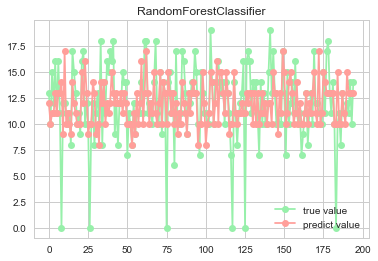

In [107]:
plot_result('RandomForestClassifier', y_pred_rf)